# Installing libraries

In [1]:
!pip install aif360
!pip install fairlearn
!pip install BlackBoxAuditing
!pip install adversarial-robustness-toolbox 
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 65.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for BlackBoxAuditing: filename=BlackBoxAuditing-0.1.54-py2.py3-none-any.whl size=1394756 sha256=41c8755931180d0dc15680bb28bf64b1387615f78ef11e9ee785e931becefc7f
  Stored in directory: /root/.cache/pip/wheels/c0/4f/b1/80e1b0790df07536470758fe0a4f9ff8fa942fd9fe30bbb192
Successfully built BlackBoxAuditing
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 101.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into acc

# Pre-processing steps

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('/kaggle/input/case-combined/merged_subjects_data.csv')
data

,time,valence,arousal,video_x,Emotion,ecg,bvp,gsr,rsp,skt,emg_zygo,emg_coru,emg_trap,video_y,SUBJECT,AGE,GENDER,EMOTION,video_name,vid_emotion
0,1061504,-1276.0,6252.0,8.0,Frustrated or Impatient,0.76062,35.053549,4.384464,27.174558,28.863552,7.86300,6.13825,5.31675,8.0,1,30-34,F,scary,Mama (2008),scary-2
1,1061554,-1276.0,6252.0,8.0,Frustrated or Impatient,0.79018,35.005141,4.360800,27.193884,28.849530,7.94525,5.76850,5.15250,8.0,1,30-34,F,scary,Mama (2008),scary-2
2,1061604,-1276.0,6268.0,8.0,Frustrated or Impatient,0.80990,35.809029,4.380504,27.213270,28.860030,8.06850,5.72750,5.02950,8.0,1,30-34,F,scary,Mama (2008),scary-2
3,1061654,-1276.0,6268.0,8.0,Frustrated or Impatient,0.83946,37.368456,4.384464,27.281031,28.863552,7.37025,6.09725,5.31675,8.0,1,30-34,F,scary,Mama (2008),scary-2
4,1061704,-1276.0,6288.0,8.0,Frustrated or Impatient,0.79018,37.145698,4.356864,27.271309,28.863552,7.65775,5.89175,5.11150,8.0,1,30-34,F,scary,Mama (2008),scary-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196278,2231442,0.0,0.0,7.0,Neutral,1.05632,37.949645,37.403472,46.155954,29.852173,5.39900,7.53450,5.89175,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196279,2231492,0.0,0.0,7.0,Neutral,0.81318,37.542807,37.419240,46.223715,29.852173,5.64550,7.98625,5.85075,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196280,2231542,0.0,0.0,7.0,Neutral,0.82632,36.961677,37.320672,46.301140,29.845152,5.56325,7.41125,5.72750,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196281,2231592,0.0,0.0,7.0,Neutral,0.83290,36.516101,37.407408,46.397951,29.862694,5.76850,7.57550,5.80975,12.0,29,25-29,M,scary,Shutter (2004),scary-1


In [3]:
data['Emotion'].unique()

array(['Frustrated or Impatient', 'Tensed or Annoyed',
       'Distressed or Defiant', 'Neutral', 'Confident or Attentive',
       'Passionate or Amused', 'Pleased or Glad', 'Delighted or Happy',
       'Worried or Apathetic', 'Frustrated or Discontented',
       'Aroused or Astonished', 'Miserable or Sad', 'Anxious or Dejected',
       'Tired or Bored', 'Polite or Sleepy', 'Excited or Adventurous'],
      dtype=object)

In [4]:
# Define positive and negative emotions
positive_emotions = [
    'Confident or Attentive', 'Passionate or Amused', 'Pleased or Glad', 
    'Delighted or Happy', 'Excited or Adventurous', 'Polite or Sleepy', 
    'Neutral', 'Aroused or Astonished'
]

# Add a new column 'Emotion_Type' to classify emotions as Positive or Negative
data['Emotion_Type'] = data['Emotion'].apply(
    lambda x: 'Positive' if x in positive_emotions else 'Negative'
)
# Define the columns to retain
columns_to_keep = [
    'ecg', 'bvp', 'gsr', 'rsp', 'skt', 'emg_coru', 'emg_trap', 'emg_zygo',  # 8 physio features
    'Emotion', 'AGE', 'GENDER', 'Emotion_Type'  # Other required columns
]

# Create a new DataFrame retaining only the specified columns
data = data[columns_to_keep]

In [5]:
data

,ecg,bvp,gsr,rsp,skt,emg_coru,emg_trap,emg_zygo,Emotion,AGE,GENDER,Emotion_Type
0,0.76062,35.053549,4.384464,27.174558,28.863552,6.13825,5.31675,7.86300,Frustrated or Impatient,30-34,F,Negative
1,0.79018,35.005141,4.360800,27.193884,28.849530,5.76850,5.15250,7.94525,Frustrated or Impatient,30-34,F,Negative
2,0.80990,35.809029,4.380504,27.213270,28.860030,5.72750,5.02950,8.06850,Frustrated or Impatient,30-34,F,Negative
3,0.83946,37.368456,4.384464,27.281031,28.863552,6.09725,5.31675,7.37025,Frustrated or Impatient,30-34,F,Negative
4,0.79018,37.145698,4.356864,27.271309,28.863552,5.89175,5.11150,7.65775,Frustrated or Impatient,30-34,F,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
196278,1.05632,37.949645,37.403472,46.155954,29.852173,7.53450,5.89175,5.39900,Neutral,25-29,M,Positive
196279,0.81318,37.542807,37.419240,46.223715,29.852173,7.98625,5.85075,5.64550,Neutral,25-29,M,Positive
196280,0.82632,36.961677,37.320672,46.301140,29.845152,7.41125,5.72750,5.56325,Neutral,25-29,M,Positive
196281,0.83290,36.516101,37.407408,46.397951,29.862694,7.57550,5.80975,5.76850,Neutral,25-29,M,Positive


Gender and Age Distribution (Heatmap Data):
AGE     20-24  25-29  30-34  35-39
GENDER                            
F       47654  32822  13625      0
M       20440  61304   6812  13626
Total Instances: 196283


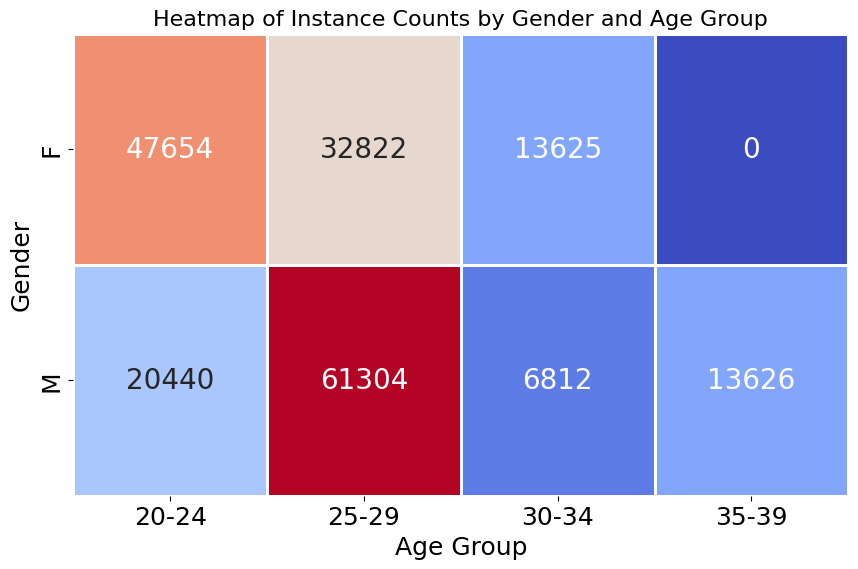


Emotion Type Counts and Percentages:
Emotion
Neutral                       108843
Confident or Attentive         18418
Passionate or Amused           17212
Frustrated or Impatient        16325
Distressed or Defiant          11175
Worried or Apathetic            6601
Tensed or Annoyed               4845
Delighted or Happy              4296
Pleased or Glad                 2963
Frustrated or Discontented      1823
Tired or Bored                  1195
Aroused or Astonished           1152
Polite or Sleepy                 982
Miserable or Sad                 247
Anxious or Dejected              157
Excited or Adventurous            49
Name: count, dtype: int64
Emotion
Neutral                       55.452077
Confident or Attentive         9.383390
Passionate or Amused           8.768971
Frustrated or Impatient        8.317073
Distressed or Defiant          5.693310
Worried or Apathetic           3.363001
Tensed or Annoyed              2.468375
Delighted or Happy             2.188677
Pleased 

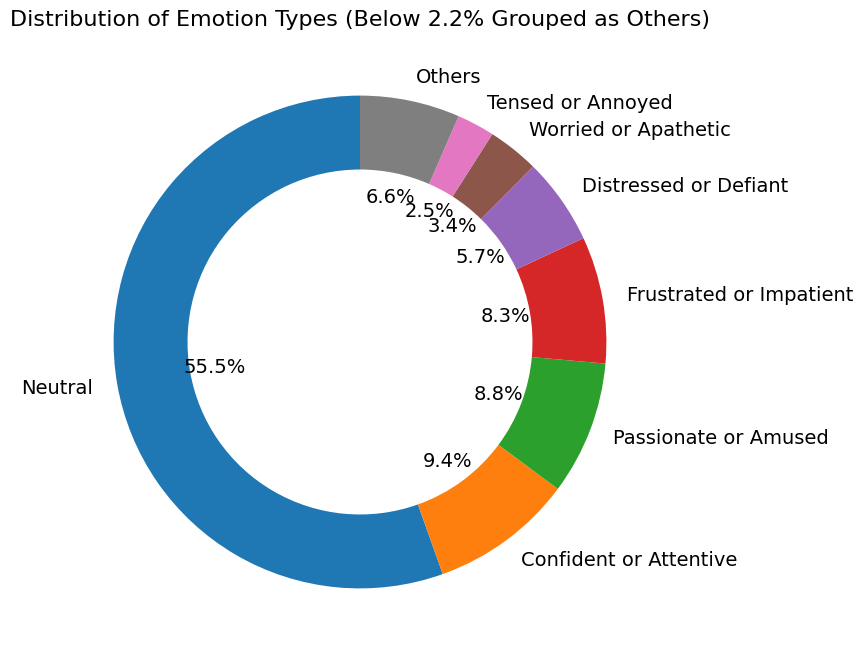


Number of Instances with 'Neutral': 108843

Emotion Type Counts (Excluding Neutral):
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Pleased or Glad                2963
Frustrated or Discontented     1823
Tired or Bored                 1195
Aroused or Astonished          1152
Polite or Sleepy                982
Miserable or Sad                247
Anxious or Dejected             157
Excited or Adventurous           49
Name: count, dtype: int64
Total Instances (Excluding Neutral): 87440
Emotion Type Percentages (Excluding Neutral):
Emotion
Confident or Attentive        21.063586
Passionate or Amused          19.684355
Frustrated or Impatient       18.669945
Distressed or Defiant         12.780192
Worried or Apathetic           7.549177
Tensed or Annoyed              5.540942
Del

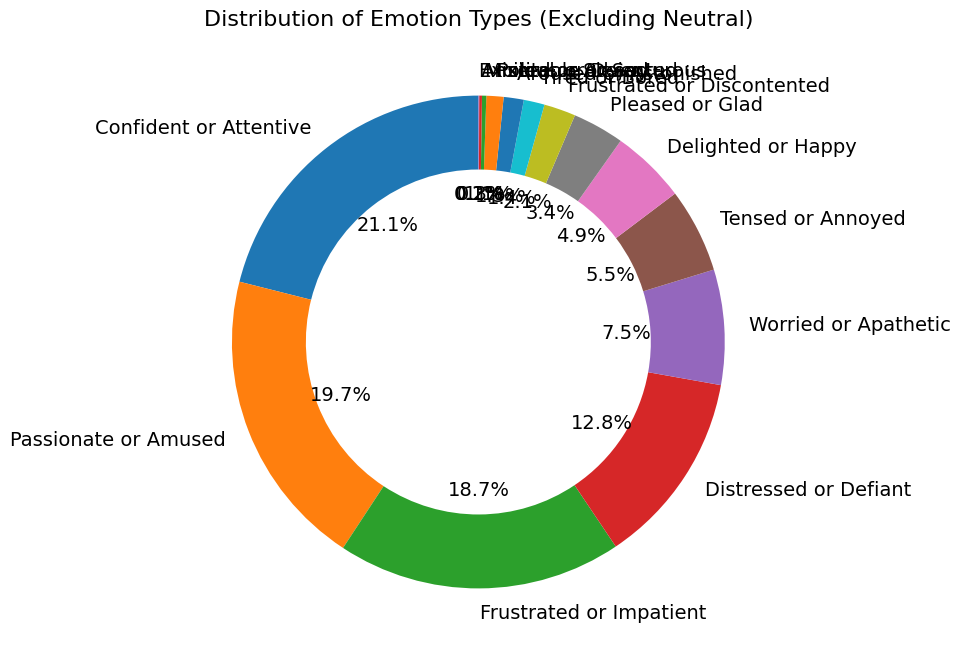


Age Group Distribution:
AGE
25-29    94126
20-24    68094
30-34    20437
35-39    13626
Name: count, dtype: int64
Total Instances in Age Groups: 196283


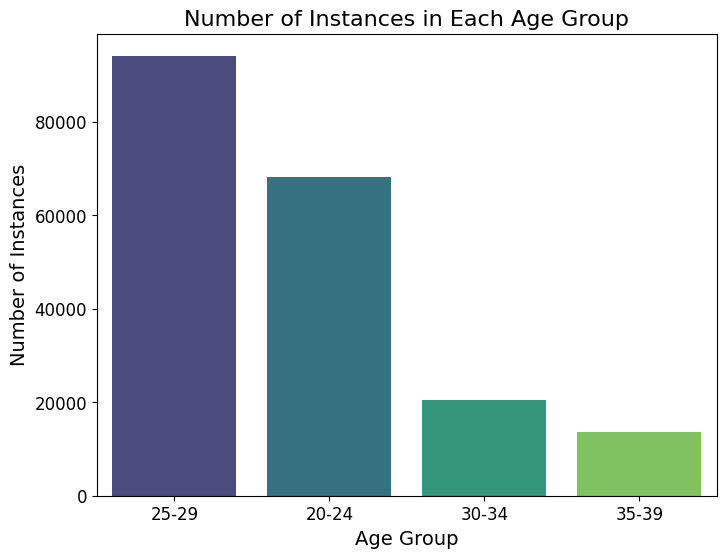


Gender Distribution:
GENDER
M    102182
F     94101
Name: count, dtype: int64
Total Instances in Gender Classes: 196283


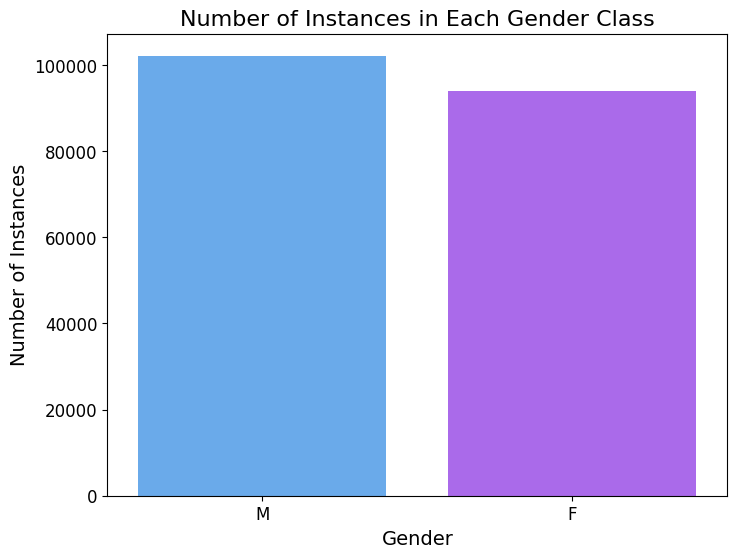

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example DataFrame (replace with your dataset)
# data = pd.read_csv("your_data.csv")

# 1. Heatmap for Gender and Age Distribution
plt.figure(figsize=(10, 6))

# Grouping data by Gender and Age and calculating the count
heatmap_data = data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)

# Print the heatmap data and total count
print("Gender and Age Distribution (Heatmap Data):")
print(heatmap_data)
print(f"Total Instances: {heatmap_data.sum().sum()}")  # Total instances in the heatmap data

# Create the heatmap
sns.heatmap(
    heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=1, cbar=False,
    annot_kws={"size": 20}  # Adjust text size
)
plt.title('Heatmap of Instance Counts by Gender and Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Gender', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# 2. Donut Chart for Emotion_Type Distribution (with threshold)
percentage_threshold = 2.2  # Set the percentage threshold (e.g., 5%)
emotion_type_counts = data['Emotion'].value_counts()

# Calculate percentages
total_count = emotion_type_counts.sum()
emotion_type_percentages = (emotion_type_counts / total_count) * 100

# Print the emotion type counts, percentages, and total instances
print("\nEmotion Type Counts and Percentages:")
print(emotion_type_counts)
print(emotion_type_percentages)
print(f"Total Instances: {total_count}")  # Total instances in emotion type data

# Group smaller categories
emotion_type_counts_filtered = emotion_type_counts[emotion_type_percentages >= percentage_threshold]
others_count = emotion_type_counts[emotion_type_percentages < percentage_threshold].sum()
if others_count > 0:
    emotion_type_counts_filtered["Others"] = others_count

# Plot the initial donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    emotion_type_counts_filtered, labels=emotion_type_counts_filtered.index, autopct='%1.1f%%', 
    startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
)
plt.title(f'Distribution of Emotion Types (Below {percentage_threshold}% Grouped as Others)', fontsize=16)
plt.show()

# 3. Remove 'Neutral' instances and plot donut chart again
# Print the count of 'Neutral' instances before excluding
neutral_count = data[data['Emotion'] == 'Neutral'].shape[0]
print(f"\nNumber of Instances with 'Neutral': {neutral_count}")

# Remove 'Neutral' instances
data_no_neutral = data[data['Emotion'] != 'Neutral']

# Recalculate emotion type counts and percentages for non-neutral instances
emotion_type_counts_no_neutral = data_no_neutral['Emotion'].value_counts()

# Print the filtered emotion type counts and total instances
print("\nEmotion Type Counts (Excluding Neutral):")
print(emotion_type_counts_no_neutral)
print(f"Total Instances (Excluding Neutral): {emotion_type_counts_no_neutral.sum()}")  # Total instances excluding 'Neutral'

# Calculate percentages for non-neutral instances
emotion_type_percentages_no_neutral = (emotion_type_counts_no_neutral / emotion_type_counts_no_neutral.sum()) * 100
print("Emotion Type Percentages (Excluding Neutral):")
print(emotion_type_percentages_no_neutral)

# Plot the donut chart again without Neutral instances
plt.figure(figsize=(8, 8))
plt.pie(
    emotion_type_counts_no_neutral, labels=emotion_type_counts_no_neutral.index, autopct='%1.1f%%', 
    startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
)
plt.title('Distribution of Emotion Types (Excluding Neutral)', fontsize=16)
plt.show()

# 4. Bar Plot for Age Group Distribution
plt.figure(figsize=(8, 6))

# Count the instances for each age group
age_counts = data['AGE'].value_counts()

# Print the age group distribution and total instances
print("\nAge Group Distribution:")
print(age_counts)
print(f"Total Instances in Age Groups: {age_counts.sum()}")  # Total instances in age groups

# Create the bar plot
sns.barplot(
    x=age_counts.index,
    y=age_counts.values,
    palette='viridis'
)
plt.title('Number of Instances in Each Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 5. Bar Plot for Gender Distribution
plt.figure(figsize=(8, 6))

# Count the instances for each gender
gender_counts = data['GENDER'].value_counts()

# Print the gender distribution and total instances
print("\nGender Distribution:")
print(gender_counts)
print(f"Total Instances in Gender Classes: {gender_counts.sum()}")  # Total instances in gender classes

# Create the bar plot
sns.barplot(
    x=gender_counts.index,
    y=gender_counts.values,
    palette='cool'
)
plt.title('Number of Instances in Each Gender Class', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Missing values before cleaning:
ecg             1
bvp             1
gsr             1
rsp             1
skt             1
emg_coru        1
emg_trap        1
emg_zygo        1
Emotion         0
AGE             0
GENDER          0
Emotion_Type    0
dtype: int64

Missing values after cleaning:
ecg             1
bvp             1
gsr             1
rsp             1
skt             1
emg_coru        1
emg_trap        1
emg_zygo        1
Emotion         0
AGE             0
GENDER          0
Emotion_Type    0
dtype: int64
Target size per class: 2963

Old Emotion Class Distribution:
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Pleased or Glad                2963
Frustrated or Discontented     1823
Tired or Bored                 1195
Aroused or Astonished          1152
Polite or Sle

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



New Emotion Class Distribution:
Counter({'Confident or Attentive': 18418, 'Passionate or Amused': 17212, 'Frustrated or Impatient': 16325, 'Distressed or Defiant': 11175, 'Worried or Apathetic': 6601, 'Tensed or Annoyed': 4845, 'Delighted or Happy': 4296, 'Tired or Bored': 3154, 'Pleased or Glad': 2963, 'Anxious or Dejected': 2962, 'Excited or Adventurous': 2959, 'Aroused or Astonished': 2958, 'Polite or Sleepy': 2948, 'Miserable or Sad': 2939, 'Frustrated or Discontented': 2809})
Total Instances after balancing: 102564
       ecg        bvp       gsr        rsp        skt  emg_coru  emg_trap  \
0  0.76062  35.053549  4.384464  27.174558  28.863552   6.13825   5.31675   
1  0.79018  35.005141  4.360800  27.193884  28.849530   5.76850   5.15250   
2  0.80990  35.809029  4.380504  27.213270  28.860030   5.72750   5.02950   
3  0.83946  37.368456  4.384464  27.281031  28.863552   6.09725   5.31675   
4  0.79018  37.145698  4.356864  27.271309  28.863552   5.89175   5.11150   

   emg_zyg

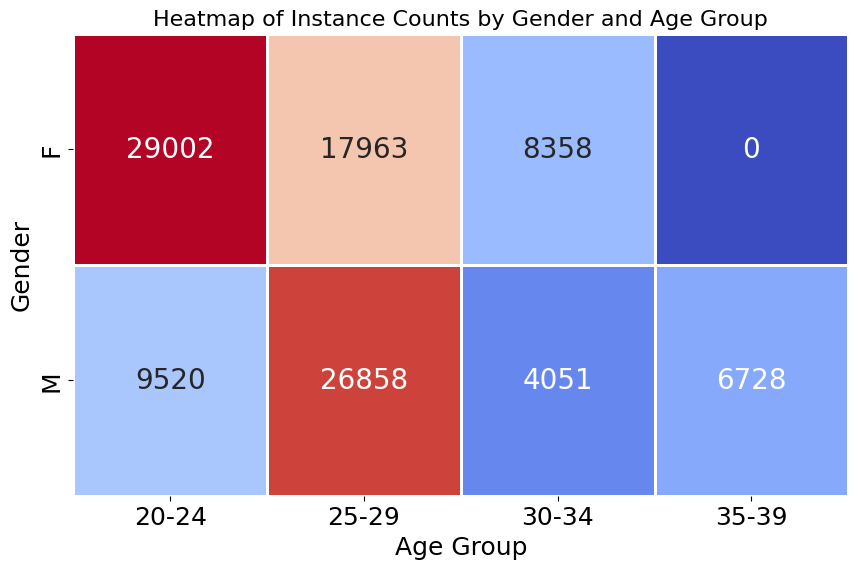


Emotion Distribution Information:
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Tired or Bored                 3154
Pleased or Glad                2963
Anxious or Dejected            2962
Excited or Adventurous         2959
Aroused or Astonished          2958
Polite or Sleepy               2948
Miserable or Sad               2939
Frustrated or Discontented     2809
Name: count, dtype: int64
Total Instances in Emotion Distribution: 102564
Percentages for each class:
Emotion
Confident or Attentive        17.957568
Passionate or Amused          16.781717
Frustrated or Impatient       15.916891
Distressed or Defiant         10.895636
Worried or Apathetic           6.435981
Tensed or Annoyed              4.723880
Delighted or Happy             4.188604
Tired or Bored             

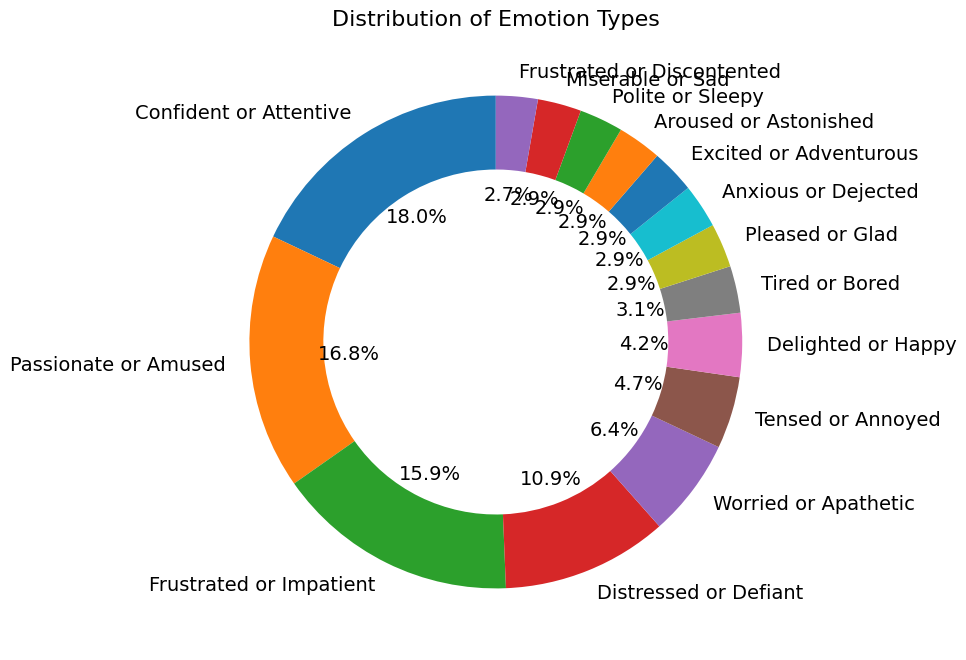


Age Group Distribution Information:
AGE
25-29    44821
20-24    38528
30-34    12409
35-39     6728
Name: count, dtype: int64
Total Instances in Age Group Distribution: 102486


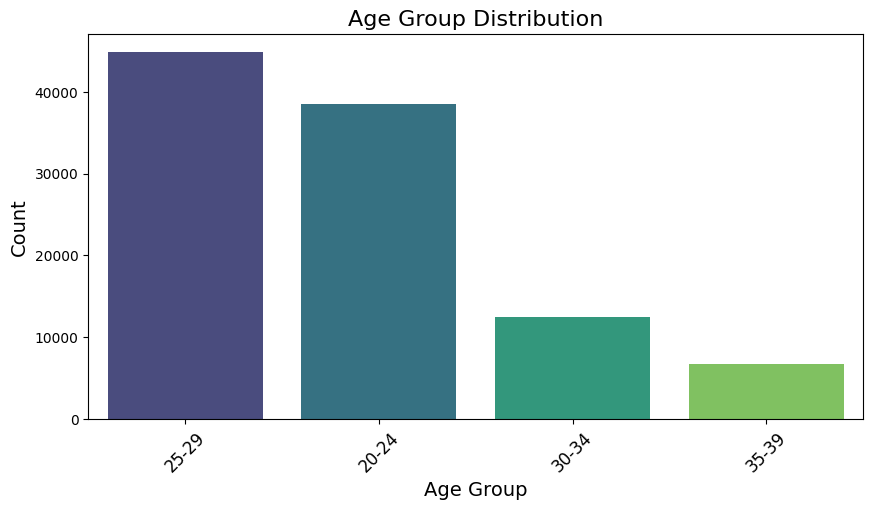

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.impute import SimpleImputer

def clean_data(data):
    """Cleans data by handling missing values in crucial columns."""
    df = data.copy()
    print("Missing values before cleaning:")
    print(df.isnull().sum())
    
    # Drop rows where crucial columns ('Emotion', 'GENDER', 'AGE') have missing values
    crucial_columns = ['Emotion', 'GENDER', 'AGE']
    df = df.dropna(subset=crucial_columns)

    df = df[df['Emotion'] != 'Neutral']
    
    print("\nMissing values after cleaning:")
    print(df.isnull().sum())
    return df

def balance_emotion_data(data):
    """Balances the Emotion data using ADASYN or SMOTE."""
    
    df = data.copy()
    
    # Calculate target size for balanced classes
    emotion_counts = df['Emotion'].value_counts()
    target_size = int(np.median(emotion_counts))  # Use median as target size for balancing
    print(f"Target size per class: {target_size}")
    
    print("\nOld Emotion Class Distribution:")
    print(emotion_counts)
    print(f"Total Instances before balancing: {emotion_counts.sum()}")
    
    X = df.drop(['Emotion', 'Emotion_Type'], axis=1)
    y = df['Emotion']
    
    # Convert categorical variables to numeric codes
    X['GENDER'] = pd.Categorical(X['GENDER']).codes
    X['AGE'] = pd.Categorical(X['AGE']).codes
    
    # Handle missing values in numeric columns
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    imputer = SimpleImputer(strategy='mean')
    X_imputed = X.copy()
    X_imputed[numeric_columns] = imputer.fit_transform(X[numeric_columns])
    
    # Handle missing values in target variable 'y' if any
    y = y.fillna(y.mode()[0])
    
    # Create sampling strategy dictionary to control synthetic data generation
    sampling_strategy = {}
    for emotion in y.unique():
        count = Counter(y)[emotion]
        if count < target_size:
            sampling_strategy[emotion] = target_size
    
    # Apply ADASYN for resampling
    try:
        adasyn = ADASYN(random_state=42, n_neighbors=5, sampling_strategy=sampling_strategy)
        X_resampled, y_resampled = adasyn.fit_resample(X_imputed, y)
        
        print("\nNew Emotion Class Distribution:")
        print(Counter(y_resampled))
        print(f"Total Instances after balancing: {sum(Counter(y_resampled).values())}")
        
    except ValueError as e:
        print(f"ADASYN failed with error: {str(e)}")
        print("Falling back to SMOTE...")
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
        X_resampled, y_resampled = smote.fit_resample(X_imputed, y)
    
    # Convert back to DataFrame
    df_resampled = pd.DataFrame(X_resampled, columns=X_imputed.columns)
    df_resampled['Emotion'] = y_resampled
    
    # Convert numeric values back to categorical
    gender_map = {0: 'F', 1: 'M'}
    age_map = {0: '20-24', 1: '25-29', 2: '30-34', 3: '35-39'}
    
    df_resampled['GENDER'] = df_resampled['GENDER'].map(gender_map)
    df_resampled['AGE'] = df_resampled['AGE'].map(age_map)
    print(df_resampled.head())
    
    # Add back 'Emotion_Type'
    emotion_type_map = dict(zip(data['Emotion'], data['Emotion_Type']))
    df_resampled['Emotion_Type'] = df_resampled['Emotion'].map(emotion_type_map)
    
    return df_resampled, df

def create_visualizations(data, old_data):
    """Creates visualizations for the dataset."""
    
    print("\nHeatmap Information:")
    heatmap_data = data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)
    print(heatmap_data)
    print(f"Total Instances in Heatmap: {heatmap_data.sum().sum()}")
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=1, cbar=False,
        annot_kws={"size": 20}
    )
    plt.title('Heatmap of Instance Counts by Gender and Age Group', fontsize=16)
    plt.xlabel('Age Group', fontsize=18)
    plt.ylabel('Gender', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()
    
    print("\nEmotion Distribution Information:")
    emotion_counts = data['Emotion'].value_counts()
    total_count = emotion_counts.sum()
    emotion_percentages = (emotion_counts / total_count) * 100
    print(emotion_counts)
    print(f"Total Instances in Emotion Distribution: {total_count}")
    print("Percentages for each class:")
    print(emotion_percentages)
    
    plt.figure(figsize=(8, 8))
    plt.pie(
        emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
    )
    plt.title('Distribution of Emotion Types', fontsize=16)
    plt.show()
    
    print("\nAge Group Distribution Information:")
    age_counts = data['AGE'].value_counts()
    print(age_counts)
    print(f"Total Instances in Age Group Distribution: {age_counts.sum()}")
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('Age Group Distribution', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.show()
    
cleaned_data = clean_data(data)
balanced_data, old_data = balance_emotion_data(cleaned_data)
create_visualizations(balanced_data, old_data)

In [8]:
print(len(balanced_data))
df = balanced_data
df['AGE'] = df['AGE'].replace({'20-24': '20-29', '25-29': '20-29', '30-34': '30-39', '35-39': '30-39'})
protected_attribute_names = ['AGE', 'GENDER']
df['AGE'] = df['AGE'].map({"20-29": 0, "30-39": 1})
df['GENDER'] = df['GENDER'].map({"F": 0, "M": 1})
emotion_labels = [
    'Frustrated or Impatient', 'Tensed or Annoyed', 'Distressed or Defiant', 
    'Confident or Attentive', 'Passionate or Amused', 'Pleased or Glad', 'Delighted or Happy', 
    'Worried or Apathetic', 'Frustrated or Discontented', 'Aroused or Astonished', 'Miserable or Sad', 
    'Anxious or Dejected', 'Tired or Bored', 'Polite or Sleepy', 'Excited or Adventurous'
]
label_to_num = {label: num for num, label in enumerate(emotion_labels)}
print("Emotion Labels and Corresponding Encodings:")
print(label_to_num)
df['Emotion'] = df['Emotion'].replace(label_to_num)
emotion_type_map = {'Positive': 1, 'Negative': 0}
df['Emotion_Type'] = df['Emotion_Type'].replace(emotion_type_map)
# Drop missing values
df = df.dropna()

102564
Emotion Labels and Corresponding Encodings:
{'Frustrated or Impatient': 0, 'Tensed or Annoyed': 1, 'Distressed or Defiant': 2, 'Confident or Attentive': 3, 'Passionate or Amused': 4, 'Pleased or Glad': 5, 'Delighted or Happy': 6, 'Worried or Apathetic': 7, 'Frustrated or Discontented': 8, 'Aroused or Astonished': 9, 'Miserable or Sad': 10, 'Anxious or Dejected': 11, 'Tired or Bored': 12, 'Polite or Sleepy': 13, 'Excited or Adventurous': 14}


<ipython-input-8-1008d6e0ffc7>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Emotion'] = df['Emotion'].replace(label_to_num)
<ipython-input-8-1008d6e0ffc7>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Emotion_Type'] = df['Emotion_Type'].replace(emotion_type_map)


In [9]:
# Define label and protected attributes
label_names = ['Emotion_Type']



In [10]:
import tensorflow as tf

# Library imports

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Input, Conv1D, Flatten, Dense, MaxPooling1D, Dropout, BatchNormalization, GRU, SimpleRNN, LSTM, 
    SpatialDropout1D, LeakyReLU
)
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, classification_report, 
    confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import label_binarize

from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric, MDSSClassificationMetric
from aif360.algorithms.preprocessing import DisparateImpactRemover, Reweighing
from aif360.algorithms.postprocessing import EqOddsPostprocessing, CalibratedEqOddsPostprocessing, RejectOptionClassification

positive_emotion_numbers = [0.0, 4.0, 5.0, 6.0, 7.0, 10.0, 14.0, 15.0]

# GRU

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.4536 - loss: 1.5220 - val_accuracy: 0.7066 - val_loss: 0.7369 - learning_rate: 9.2400e-04
Epoch 2/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7313 - loss: 0.7146 - val_accuracy: 0.8057 - val_loss: 0.4920 - learning_rate: 9.2400e-04
Epoch 3/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7856 - loss: 0.5644 - val_accuracy: 0.8278 - val_loss: 0.4439 - learning_rate: 9.2400e-04
Epoch 4/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8162 - loss: 0.4837 - val_accuracy: 0.8438 - val_loss: 0.3988 - learning_rate: 9.2400e-04
Epoch 5/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8358 - loss: 0.4319 - val_accuracy: 0.8632 - val_loss: 0.3484 - learning_rate: 9.2400e-04
Epoch 6/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8490 - loss: 0.3969 - val_accuracy: 0.8681 - val_loss: 0.3440 - learning_rate: 9.2400e-04
Epoch 7/150
2242/2242 ━━━━━━━━━━━━━━━━━━

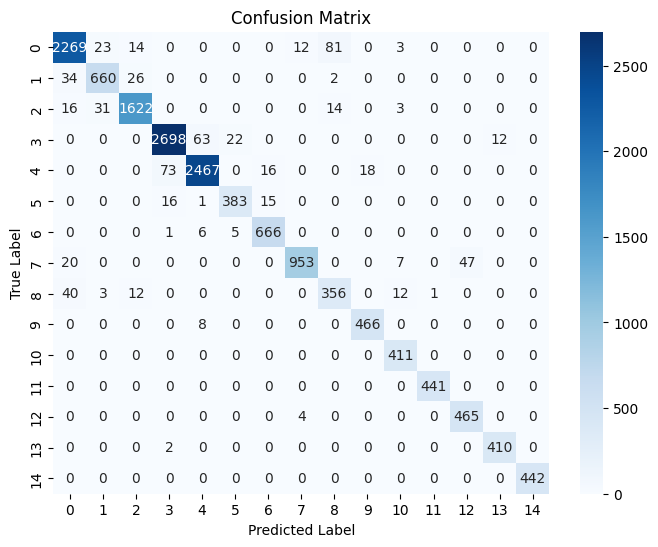

In [12]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

def build_gru_model(input_shape, num_classes):
    model = Sequential()
    
    # Single GRU Layer with 128 units
    model.add(GRU(128, input_shape=input_shape))
    model.add(Dropout(0.2))
    
    # Fully connected layers
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.000924)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Load data
X = df.drop(columns=['Emotion'])
y = df['Emotion']

# Splitting Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  

input_shape = (X_train.shape[1], 1)
num_classes = len(np.unique(y))

# Build and train GRU model
gru_model = build_gru_model(input_shape, num_classes)
history = gru_model.fit(
    X_train, y_train, 
    epochs=150, batch_size=32, 
    validation_data=(X_val, y_val), 
    callbacks=[reduce_lr],
    verbose=1
)

# Predictions on test data
predictions = gru_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

pred_df = X_test.copy()
pred_df['Emotion'] = predicted_labels
pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
y_pred = pred_df['Emotion'].values
pred_df.drop(columns=['Emotion'], inplace=True)

test_df = X_test.copy()

# Compute evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Classification Report
class_report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = tf.math.confusion_matrix(y_test, predicted_labels).numpy()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [13]:
if 'final_metrics_df' not in globals():
    final_metrics_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall"])
model_name = "GRU_Model"
new_row = pd.DataFrame([{
    "Model": model_name,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall
}])

final_metrics_df = pd.concat([final_metrics_df, new_row], ignore_index=True)


<ipython-input-13-2d8e05414d44>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_metrics_df = pd.concat([final_metrics_df, new_row], ignore_index=True)


# LSTM

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2242/2242 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3954 - loss: 1.7631 - val_accuracy: 0.7201 - val_loss: 0.7524 - learning_rate: 8.5700e-04
Epoch 2/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7140 - loss: 0.7641 - val_accuracy: 0.7899 - val_loss: 0.5425 - learning_rate: 8.5700e-04
Epoch 3/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7778 - loss: 0.5940 - val_accuracy: 0.8306 - val_loss: 0.4491 - learning_rate: 8.5700e-04
Epoch 4/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8111 - loss: 0.5064 - val_accuracy: 0.8465 - val_loss: 0.4002 - learning_rate: 8.5700e-04
Epoch 5/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8302 - loss: 0.4532 - val_accuracy: 0.8558 - val_loss: 0.3680 - learning_rate: 8.5700e-04
Epoch 6/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8495 - loss: 0.4043 - val_accuracy: 0.8851 - val_loss: 0.3079 - learning_rate: 8.5700e-04
Epoch 7/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/s

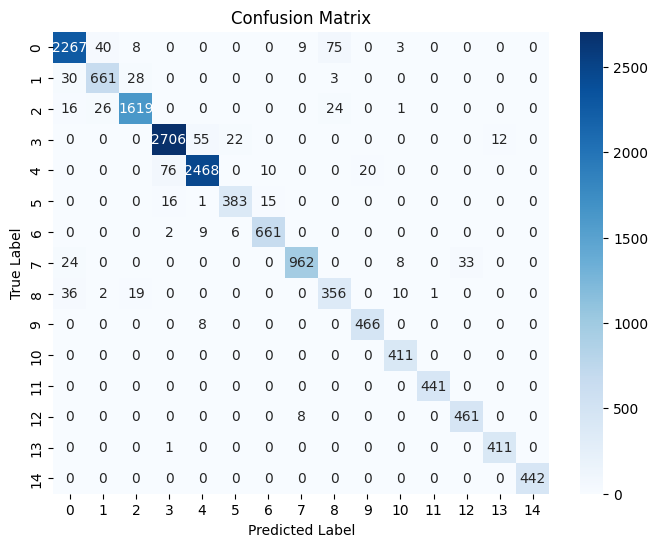

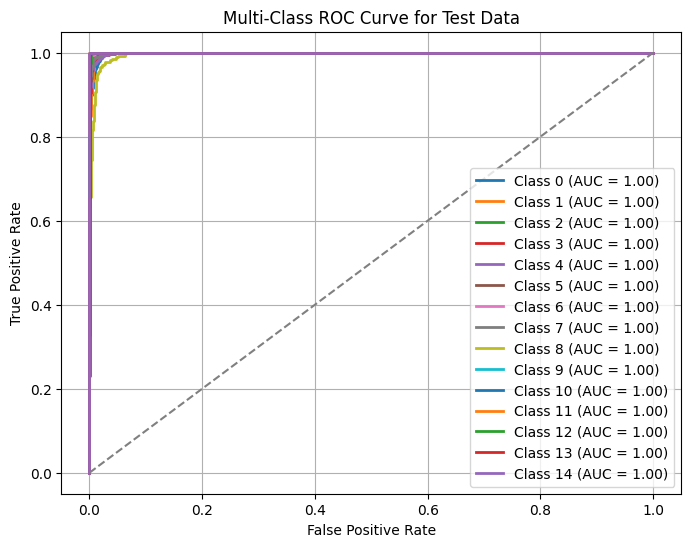

In [14]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

def build_lstm_model(input_shape, num_classes):
    model = Sequential()
    
    # Single LSTM Layer with 128 units
    model.add(LSTM(128, input_shape=input_shape))
    model.add(Dropout(0.2))
    
    # Fully connected layers
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.000857)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Load data
X = df.drop(columns=['Emotion'])
y = df['Emotion']

# Splitting Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  

input_shape = (X_train.shape[1], 1)
num_classes = len(np.unique(y))

# Build and train LSTM model
lstm_model = build_lstm_model(input_shape, num_classes)
history = lstm_model.fit(
    X_train, y_train, 
    epochs=150, batch_size=32, 
    validation_data=(X_val, y_val), 
    callbacks=[reduce_lr],
    verbose=1
)

# Predictions on test data
predictions = lstm_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

pred_df = X_test.copy()
pred_df['Emotion'] = predicted_labels
pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
y_pred = pred_df['Emotion'].values
pred_df.drop(columns=['Emotion'], inplace=True)

test_df = X_test.copy()

# Compute evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Classification Report
class_report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = tf.math.confusion_matrix(y_test, predicted_labels).numpy()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# --- ROC CURVE FOR MULTI-CLASS TEST DATA ---
n_classes = len(np.unique(y_test))  
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for Test Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [15]:
model_name = "LSTM_Model"
new_row = pd.DataFrame([{
    "Model": model_name,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall
}])

final_metrics_df = pd.concat([final_metrics_df, new_row], ignore_index=True)


# RNN

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2242/2242 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.5341 - loss: 1.2992 - val_accuracy: 0.7804 - val_loss: 0.6075 - learning_rate: 9.5500e-04
Epoch 2/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7726 - loss: 0.6109 - val_accuracy: 0.8264 - val_loss: 0.4828 - learning_rate: 9.5500e-04
Epoch 3/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8164 - loss: 0.4911 - val_accuracy: 0.8404 - val_loss: 0.4079 - learning_rate: 9.5500e-04
Epoch 4/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8366 - loss: 0.4301 - val_accuracy: 0.8266 - val_loss: 0.4631 - learning_rate: 9.5500e-04
Epoch 5/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8492 - loss: 0.3987 - val_accuracy: 0.8638 - val_loss: 0.3598 - learning_rate: 9.5500e-04
Epoch 6/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8579 - loss: 0.3717 - val_accuracy: 0.8772 - val_loss: 0.3252 - learning_rate: 9.5500e-04
Epoch 7/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - 

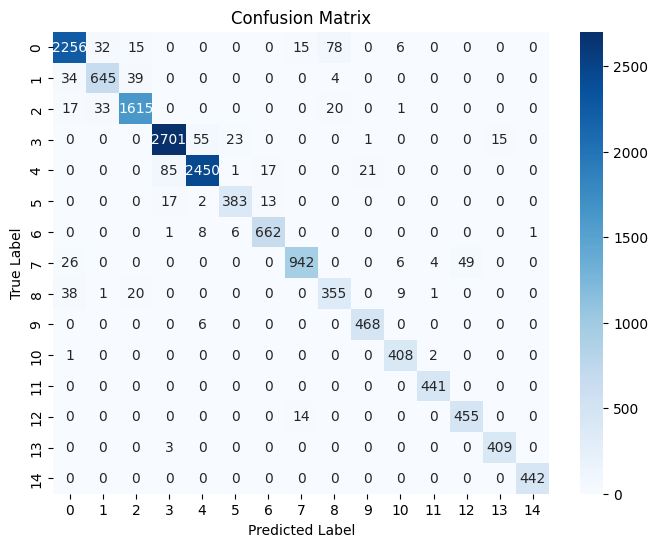

In [16]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

def build_rnn_model(input_shape, num_classes):
    model = Sequential()
    
    # RNN Layer with 128 units
    model.add(SimpleRNN(128, input_shape=input_shape))
    model.add(Dropout(0.1))
    
    # Fully connected layers
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.000955)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Load data
X = df.drop(columns=['Emotion'])
y = df['Emotion']

# Splitting Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  

input_shape = (X_train.shape[1], 1)
num_classes = len(np.unique(y))

# Build and train RNN model
rnn_model = build_rnn_model(input_shape, num_classes)
history = rnn_model.fit(
    X_train, y_train, 
    epochs=150, batch_size=32, 
    validation_data=(X_val, y_val), 
    callbacks=[reduce_lr],
    verbose=1
)

# Predictions on test data
predictions = rnn_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

pred_df = X_test.copy()
pred_df['Emotion'] = predicted_labels
pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
y_pred = pred_df['Emotion'].values
pred_df.drop(columns=['Emotion'], inplace=True)

test_df = X_test.copy()

# Compute evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Classification Report
class_report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = tf.math.confusion_matrix(y_test, predicted_labels).numpy()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [17]:
model_name = "RNN_Model"
new_row = pd.DataFrame([{
    "Model": model_name,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall
}])

final_metrics_df = pd.concat([final_metrics_df, new_row], ignore_index=True)


# CNN

Epoch 1/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.4003 - loss: 1.8667 - val_accuracy: 0.6281 - val_loss: 1.0808 - learning_rate: 4.9700e-04
Epoch 2/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6760 - loss: 0.8879 - val_accuracy: 0.7657 - val_loss: 0.7232 - learning_rate: 4.9700e-04
Epoch 3/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7333 - loss: 0.7173 - val_accuracy: 0.7974 - val_loss: 0.6158 - learning_rate: 4.9700e-04
Epoch 4/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7666 - loss: 0.6296 - val_accuracy: 0.8174 - val_loss: 0.5450 - learning_rate: 4.9700e-04
Epoch 5/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7812 - loss: 0.5933 - val_accuracy: 0.8247 - val_loss: 0.5123 - learning_rate: 4.9700e-04
Epoch 6/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7925 - loss: 0.5666 - val_accuracy: 0.8245 - val_loss: 0.4873 - learning_rate: 4.9700e-04
Epoch 7/150
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 4s

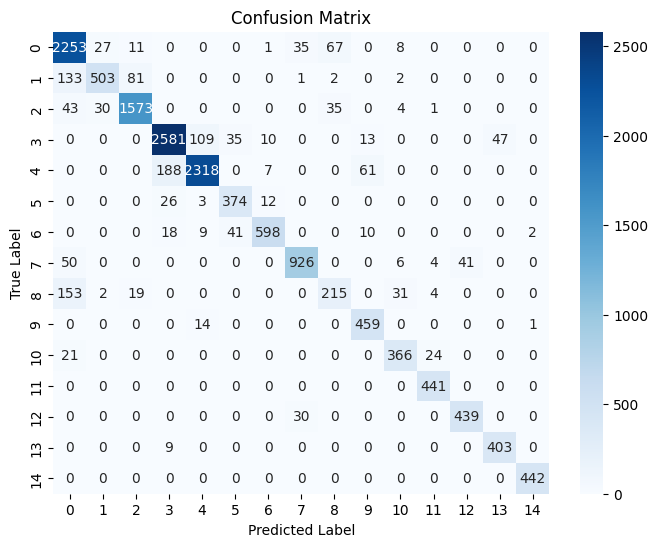

In [18]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

def build_cnn_model(input_shape, num_classes):
    """
    Build a CNN model with fixed hyperparameters (without tuning)
    """
    inputs = Input(shape=input_shape)
    
    # First Conv1D layer
    x = Conv1D(
        filters=64,  # Fixed filter count
        kernel_size=7,  # Fixed kernel size
        activation='relu',
        padding='same'
    )(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Conv1D(
        filters=32,  # Fixed filter count
        kernel_size=5,  # Fixed kernel size
        activation='relu',
        padding='same'
    )(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    # Flatten and Dense layers
    x = Flatten()(x)
    x = Dropout(0.1)(x)  # Fixed dropout value
    
    x = Dense(256, activation='relu')(x)  # Fixed dense layer size
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    
    # Fixed learning rate
    optimizer = Adam(learning_rate=0.000497)
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


# Load data
X = df.drop(columns=['Emotion'])
y = df['Emotion']

# Splitting Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  

# Reshape input for CNN
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_val_cnn = np.expand_dims(X_val, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

input_shape = (X_train_cnn.shape[1], 1)
num_classes = len(np.unique(y))

# Build and train CNN model
cnn_model = build_cnn_model(input_shape, num_classes)
history = cnn_model.fit(
    X_train_cnn, y_train, 
    epochs=150, batch_size=32, 
    validation_data=(X_val_cnn, y_val), 
    callbacks=[
        reduce_lr
    ],
    verbose=1
)

# Predictions on test data
predictions = cnn_model.predict(X_test_cnn)
predicted_labels = np.argmax(predictions, axis=1)

pred_df = X_test.copy()
pred_df = pd.DataFrame(pred_df, columns=df.drop(columns=['Emotion']).columns)
pred_df['Emotion'] = predicted_labels
pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
pred_df.drop(columns=['Emotion'], inplace=True)

test_df = X_test.copy()
test_df['Emotion_Type'] = (test_df['Emotion_Type'] == 1).astype(float)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Classification Report
class_report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = tf.math.confusion_matrix(y_test, predicted_labels).numpy()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [19]:
model_name = "CNN_Model"
new_row = pd.DataFrame([{
    "Model": model_name,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall
}])

final_metrics_df = pd.concat([final_metrics_df, new_row], ignore_index=True)


In [20]:
final_metrics_df.to_csv("all_models_metrics.csv", index=False)
print("Final metrics saved to 'all_models_metrics.csv'")

Final metrics saved to 'all_models_metrics.csv'
